<a href="https://colab.research.google.com/github/bogicho/FlyAI-5/blob/main/shape_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os, re, glob
import cv2  #openCV 라이브러리 import하기
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
def show_aug_image(image, generator, n_images=4):
    # ImageDataGenerator는 여러개의 image를 입력으로 받기 때문에 4차원으로 입력 해야함.
    image_batch = np.expand_dims(image, axis=0)
    # featurewise_center or featurewise_std_normalization or zca_whitening 가 True일때만 fit 해주어야함
    generator.fit(image_batch)
    # flow로 image batch를 generator에 넣어주어야함.
    data_gen_iter = generator.flow(image_batch)
    result=[]
    for i in range(n_images):
    	#generator에 batch size 만큼 augmentation 적용(매번 적용이 다름)
        aug_image_batch = next(data_gen_iter)
        aug_image = np.squeeze(aug_image_batch)
        aug_image = aug_image.astype('float')
        aug_image/=255
        result.append(aug_image)
    return result


In [ ]:
imagePath = '/content/drive/MyDrive/archive (2)'
categories = ['circles', 'squares', 'triangles']
nb_classes = len(categories)

data_generator_horizontal = ImageDataGenerator(horizontal_flip=True)
data_generator_vertical = ImageDataGenerator(vertical_flip=True)
data_generator_zoom = ImageDataGenerator(zoom_range=[0.5, 0.9])

X = []
for idx, cate in enumerate(categories):
    label = [0 for i in range(nb_classes)]
    label[idx] = 1
    image_dir = imagePath+'/'+cate+'/'
    for top, dir, f in os.walk(image_dir):
        for filename in f:
            image = cv2.cvtColor(cv2.imread(image_dir+filename), cv2.COLOR_BGR2RGB)
            X+=show_aug_image(image, data_generator_horizontal, n_images=4)
            X+=show_aug_image(image, data_generator_vertical, n_images=4)
            X+=show_aug_image(image, data_generator_zoom, n_images=4)

X = np.array(X)
Y = np.concatenate([np.zeros(1200), np.full(1200, 1), np.full(1200, 2)])
Y=Y.astype(int)
print('X_Shape :' , X.shape)
print('Y_Shape :' , Y.shape)

X_Shape : (3600, 28, 28, 3)
Y_Shape : (3600,)


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(
            X, Y, test_size = 0.2, random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(
            X_train, y_train, test_size = 0.2, random_state = 42)
print('X_train : ', X_train.shape)
print('X_val : ', X_val.shape)
print('X_test : ', X_test.shape)

X_train :  (2304, 28, 28, 3)
X_val :  (576, 28, 28, 3)
X_test :  (720, 28, 28, 3)


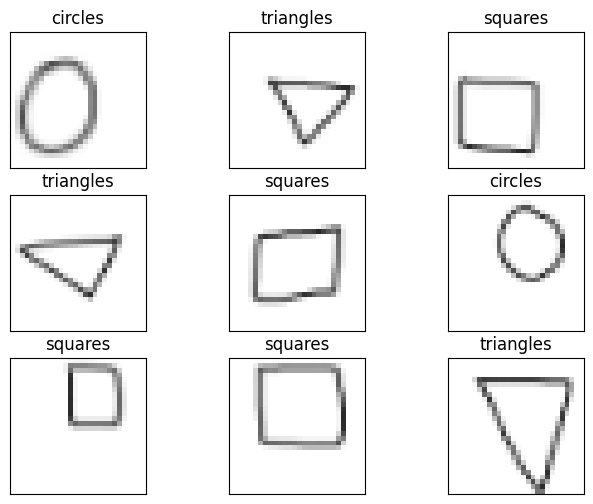

In [ ]:
import matplotlib.pyplot as plt
samples = np.random.randint(len(X_train), size=9)
class_names = ['circles', 'squares', 'triangles']
plt.figure(figsize = (8, 6))
for i, idx in enumerate(samples):
   plt.subplot(3, 3, i+1)
   plt.xticks([])
   plt.yticks([])
   plt.imshow(X_train[idx], cmap = 'gray')
   plt.title(class_names[y_train[idx]])
plt.show()

In [ ]:
print('X_train : ', X_train.shape)
print('X_val : ', X_val.shape)
print('X_test : ', X_test.shape)

X_train :  (2304, 28, 28, 3)
X_val :  (576, 28, 28, 3)
X_test :  (720, 28, 28, 3)


In [ ]:
from tensorflow.keras.utils import to_categorical
y_train_oh = to_categorical(y_train)
y_val_oh = to_categorical(y_val)
y_test_oh = to_categorical(y_test)
y_train_oh[:5]

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]], dtype=float32)

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
def build_dropout_model():
   model = keras.Sequential()
   model.add(layers.Conv2D(filters=16,
                           kernel_size= 3,
                           strides=(1, 1),
                           padding='same',
                           activation='relu',
                           input_shape=(28, 28, 3)))

   model.add(layers.MaxPool2D(pool_size=(2, 2), strides=2))
   model.add(layers.Dropout(0.2))

   model.add(layers.Conv2D(filters=32,
                           kernel_size= 3,
                           strides=(1, 1),
                           padding='same',
                           activation='relu'))

   model.add(layers.MaxPool2D(pool_size=(2, 2), strides=2))
   model.add(layers.Dropout(0.2))

   model.add(layers.Conv2D(filters=64,
                           kernel_size= 3,
                           strides=(1, 1),
                           padding='same',
                           activation='relu'))

   model.add(layers.MaxPool2D(pool_size=(2, 2), strides=2))
   model.add(layers.Dropout(0.2))

   model.add(layers.Flatten())
   model.add(layers.Dense(64, activation = 'relu'))
   model.add(layers.Dense(3, activation = 'softmax'))
   return model

In [ ]:
model = build_dropout_model()
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 28, 28, 16)        448       
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 14, 14, 16)       0         
 g2D)                                                            
                                                                 
 dropout_30 (Dropout)        (None, 14, 14, 16)        0         
                                                                 
 conv2d_31 (Conv2D)          (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 7, 7, 32)         0         
 g2D)                                                            
                                                                 
 dropout_31 (Dropout)        (None, 7, 7, 32)        

In [ ]:
import tensorflow as tf

model.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics=['acc'])

In [ ]:
from tensorflow.keras import callbacks
checkpoint_path = 'temp/cifar_10.ckpt'
checkpoint = callbacks.ModelCheckpoint(checkpoint_path,
               save_weights_only=True,
               save_best_only=True,
               monitor='val_loss')

In [ ]:
callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss',
                                           patience=10)]

EPOCHS = 300
BATCH_SIZE = 64
history = model.fit(X_train, y_train_oh,
                    epochs = EPOCHS,
                    batch_size = BATCH_SIZE,
                    validation_data = (X_val, y_val_oh),
                    callbacks=[callbacks,checkpoint],
                    verbose = 1)

Epoch 1/300
36/36 [==============================] - 2s 12ms/step - loss: 1.1186 - acc: 0.3194 - val_loss: 1.0990 - val_acc: 0.3247
Epoch 2/300
36/36 [==============================] - 0s 6ms/step - loss: 1.1011 - acc: 0.3429 - val_loss: 1.0974 - val_acc: 0.3403
Epoch 3/300
36/36 [==============================] - 0s 7ms/step - loss: 1.0979 - acc: 0.3589 - val_loss: 1.0945 - val_acc: 0.4236
Epoch 4/300
36/36 [==============================] - 0s 7ms/step - loss: 1.0888 - acc: 0.3841 - val_loss: 1.0675 - val_acc: 0.4913
Epoch 5/300
36/36 [==============================] - 0s 6ms/step - loss: 1.0462 - acc: 0.4601 - val_loss: 0.9830 - val_acc: 0.4705
Epoch 6/300
36/36 [==============================] - 0s 11ms/step - loss: 0.9271 - acc: 0.5638 - val_loss: 0.7669 - val_acc: 0.6997
Epoch 7/300
36/36 [==============================] - 0s 13ms/step - loss: 0.6784 - acc: 0.6984 - val_loss: 0.5259 - val_acc: 0.8142
Epoch 8/300
36/36 [==============================] - 0s 10ms/step - loss: 0.5068

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  plt.figure(figsize=(16,8))
  plt.subplot(1,2,1)
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.plot(hist['epoch'], hist['loss'], label='Train Loss')
  plt.plot(hist['epoch'], hist['val_loss'],label = 'Val Loss')
  plt.legend()

  plt.subplot(1,2,2)
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.plot(hist['epoch'], hist['acc'], label='Train Accuracy')
  plt.plot(hist['epoch'], hist['val_acc'], label = 'Val Accuracy')
  plt.legend()
plt.show()

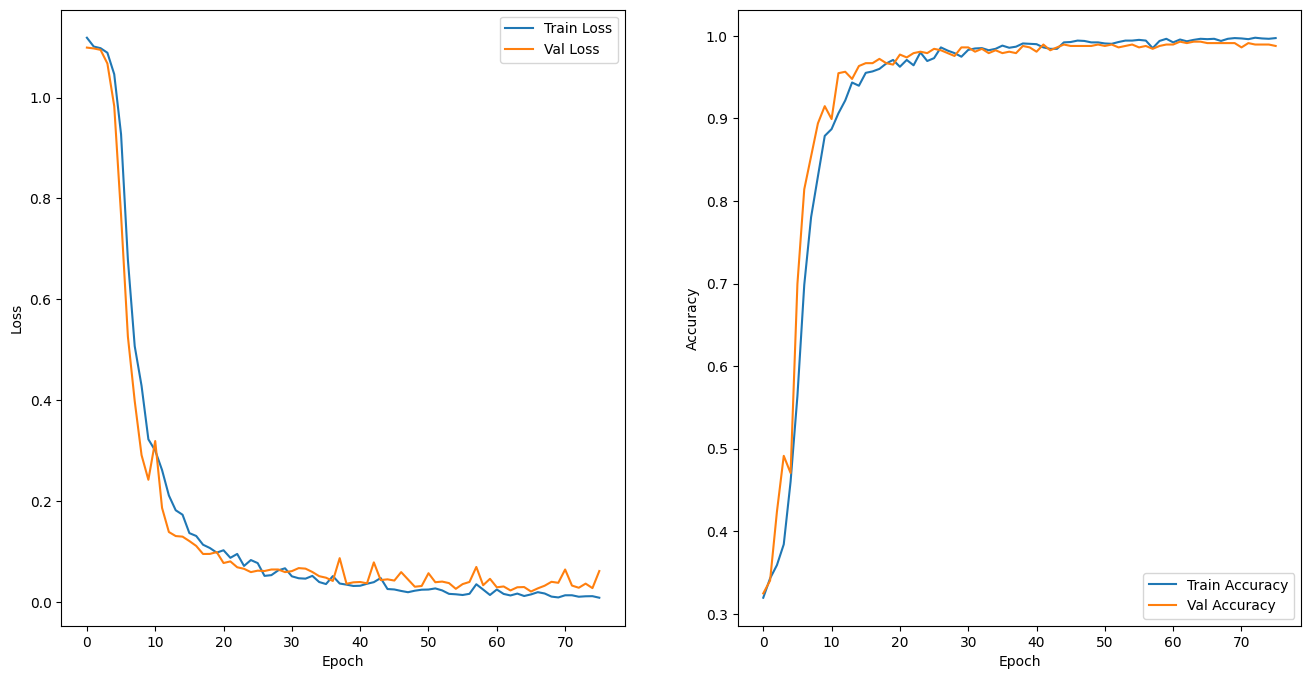

In [ ]:
plot_history(history)

In [ ]:
y_pred = model.predict(X_test)
y_pred_argmax = np.argmax(y_pred, axis=1)
y_pred_argmax[:10]

23/23 [==============================] - 0s 3ms/step


array([1, 1, 2, 2, 0, 2, 1, 0, 2, 1])

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def print_score(y_test, y_pred):
   print('accuracy: %.3f' % (accuracy_score(y_test, y_pred)))
   print('precision: %.3f' % (precision_score(y_test, y_pred, average='macro')))
   print('recall_score: %.3f' % (recall_score(y_test, y_pred, average='macro')))
   print('f1_score: %.3f' % (f1_score(y_test, y_pred, average='macro')))

In [ ]:
print_score(y_test, y_pred_argmax)

accuracy: 0.985
precision: 0.985
recall_score: 0.985
f1_score: 0.985


<Figure size 1600x1000 with 0 Axes>

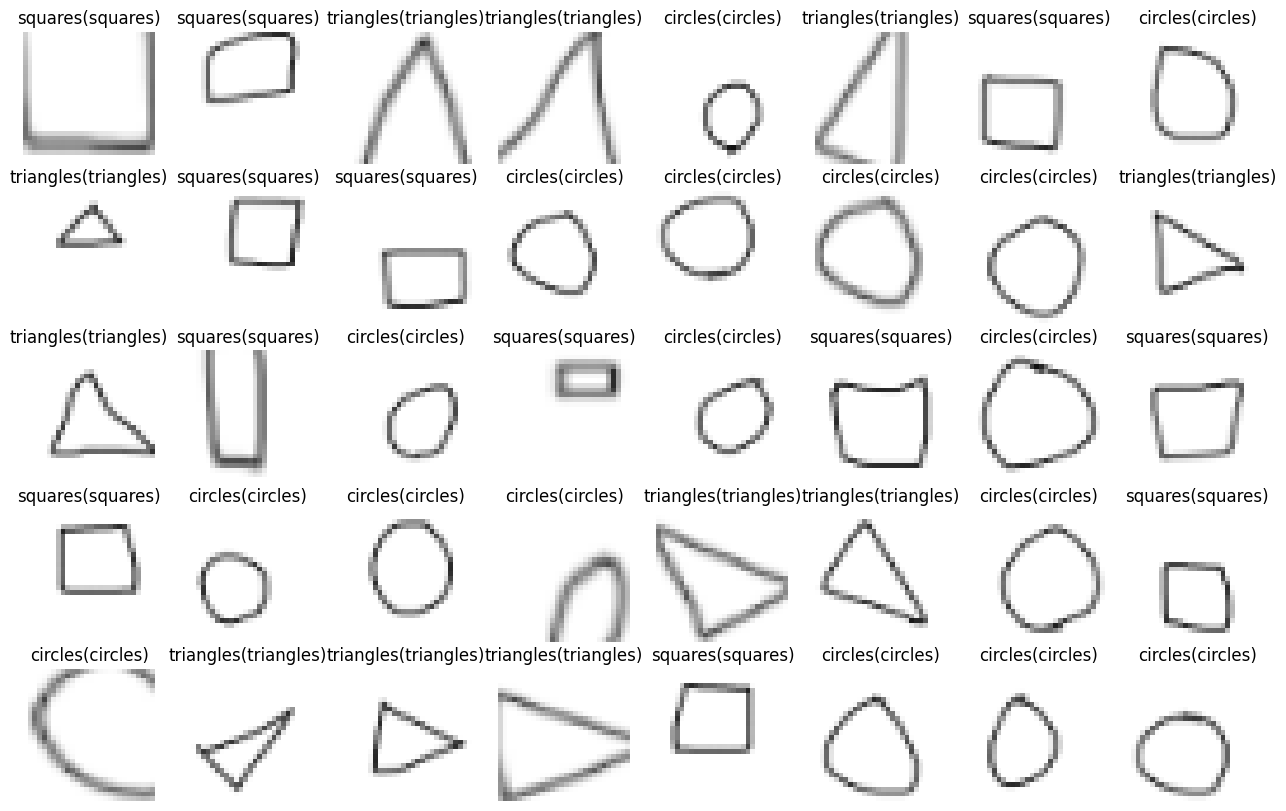

In [ ]:
n_rows = 5
n_cols = 8

plt.figure(figsize = (n_cols *2, n_rows *2))
plt.figure(figsize = (n_cols *2, n_rows *2))
for row in range(n_rows):
  for col in range(n_cols):
    index = n_cols * row + col
    plt.subplot(n_rows, n_cols, index + 1)
    plt.imshow(X_test[index].reshape(28,28,3), cmap = 'gray')
    #plt.imshow(X_test[index], cmap = 'gray')
    plt.axis('off')
    plt.title(f'{class_names[y_pred_argmax[index]]}({class_names[y_test[index]]})')

plt.show()